# Firm profits

1. simulate firm profits 
2. collect stylized facts
3. replicate stylized facts

In [96]:
%matplotlib inline
from stockmarket.firms import Firm
from numpy.testing import assert_equal
from stockmarket import setup
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import pandas as pd

# Geometric brownian motion

In [2]:
initial_profit=1000
time=800
all_delta=0.00396825396
all_sigma=0.125
gbm_mu=0.058

In [3]:
def determine_profit(previous_profit, all_delta, all_sigma, gbm_mu):
    """Determines the next profit according to a geometric brownian motion"""
    sqrt_delta_sigma = math.sqrt(all_delta) * all_sigma
    brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma)
    sigma_pow_mu_delta = (gbm_mu - 0.5 * math.pow(all_sigma, 2.0)) * all_delta
    geometric_brownian_motion_log_return = brownian_motion + sigma_pow_mu_delta
    retur = np.exp(geometric_brownian_motion_log_return)
    nextProfit = previous_profit * retur
    return nextProfit

In [4]:
determine_profit(initial_profit, all_delta, all_sigma, gbm_mu)

1004.0245946951565

In [5]:
profits = [initial_profit]
for i in range(time):
    profits.append(determine_profit(profits[-1], all_delta, all_sigma, gbm_mu))

# Test on firms

In [8]:
firm = Firm(name="test", book_value=10000, profits=[100], mu=0.03, brownian_delta=0.25,
                brownian_sigma=0.1, dividend_rate=1)
firm.update_profits(105)
assert_equal([firm.profit, firm.profit_history], [105, [100, 105]])

In [93]:
firms = setup.setup_firms(init_book_value=(10000,10000),
                              init_profit=(200,200),
                              firm_profit_mu=0.058,
                              firm_profit_delta=0.00396825396,
                              firm_profit_sigma=0.125,
                              amount_of_firms=1
                              )

In [94]:
for t in range(time):
    for f in firms:
        profit = f.determine_profit()
        f.update_profits(profit)

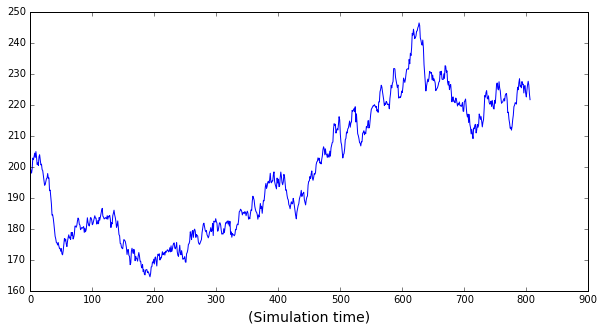

In [95]:
profits = firms[0].profit_history

fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(range(len(profits)), profits)

ax1.set_xlabel('(Simulation time)', fontsize='14')

# Stylized facts
1. autocorrelations
2. Kurtosis 

In [98]:
profitsSeries = pd.Series(firms[0].profit_history)

In [104]:
profitsSeries.diff()[1:].autocorr()

0.034053474586893111

In [106]:
profitsSeries.diff().kurtosis()

0.22243944196732013